In [1]:
!curl -L -o ./higher-education-predictors-of-student-retention.zip https://www.kaggle.com/api/v1/datasets/download/thedevastator/higher-education-predictors-of-student-retention

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 37 89332   37 33736    0     0  19570      0  0:00:04  0:00:01  0:00:03 32626
100 89332  100 89332    0     0  40310      0  0:00:02  0:00:02 --:--:-- 58501


In [2]:
import zipfile

with zipfile.ZipFile("./higher-education-predictors-of-student-retention.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

df = pd.read_csv("./dataset.csv")

In [4]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
df.duplicated().sum()

np.int64(0)

### target preprocessing

In [8]:
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
df = df[df["Target"] != "Enrolled"]
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

C:\Users\rt.x\AppData\Local\Temp\ipykernel_8132\336216038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='Set2')


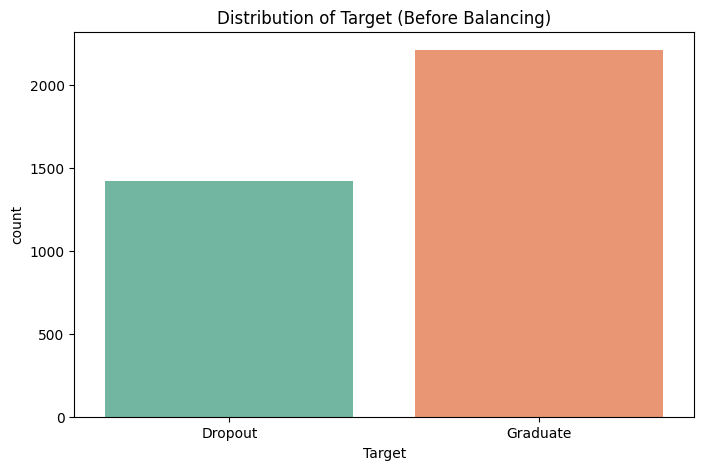

In [10]:
# Count plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Target', palette='Set2')
plt.title('Distribution of Target (Before Balancing)')
plt.show()

### label encode the target column

In [11]:
df["Target"] = df["Target"].map({"Dropout": 1, "Graduate": 0})
df.head()



,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


### outlier detection and removal

In [12]:
# Custom outlier removal for grade columns (0-20 scale)
curricular_cols = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
]

for col in curricular_cols:
    df = df[(df[col] >= 0) & (df[col] <= 20)]

In [13]:
# IQR-based outlier removal for other numeric columns
numeric_cols = ['Age at enrollment','Unemployment rate','Inflation rate', 'GDP']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

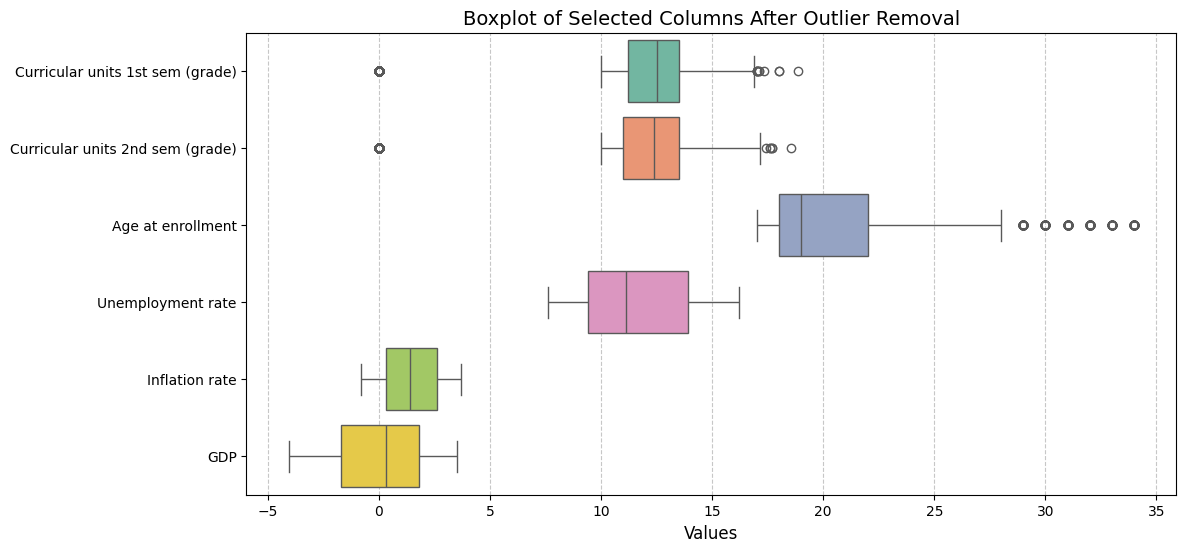

In [14]:
# Selected columns for boxplot
selected_cols = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_cols], orient='h', palette='Set2')
plt.title("Boxplot of Selected Columns After Outlier Removal", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

numeric_cols_to_scale = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Age at enrollment'
]

# Separate features and target *before* scaling and balancing
X_features = df.drop('Target', axis=1)
y_target = df['Target']

scaler = StandardScaler()

X_features[numeric_cols_to_scale] = scaler.fit_transform(X_features[numeric_cols_to_scale])

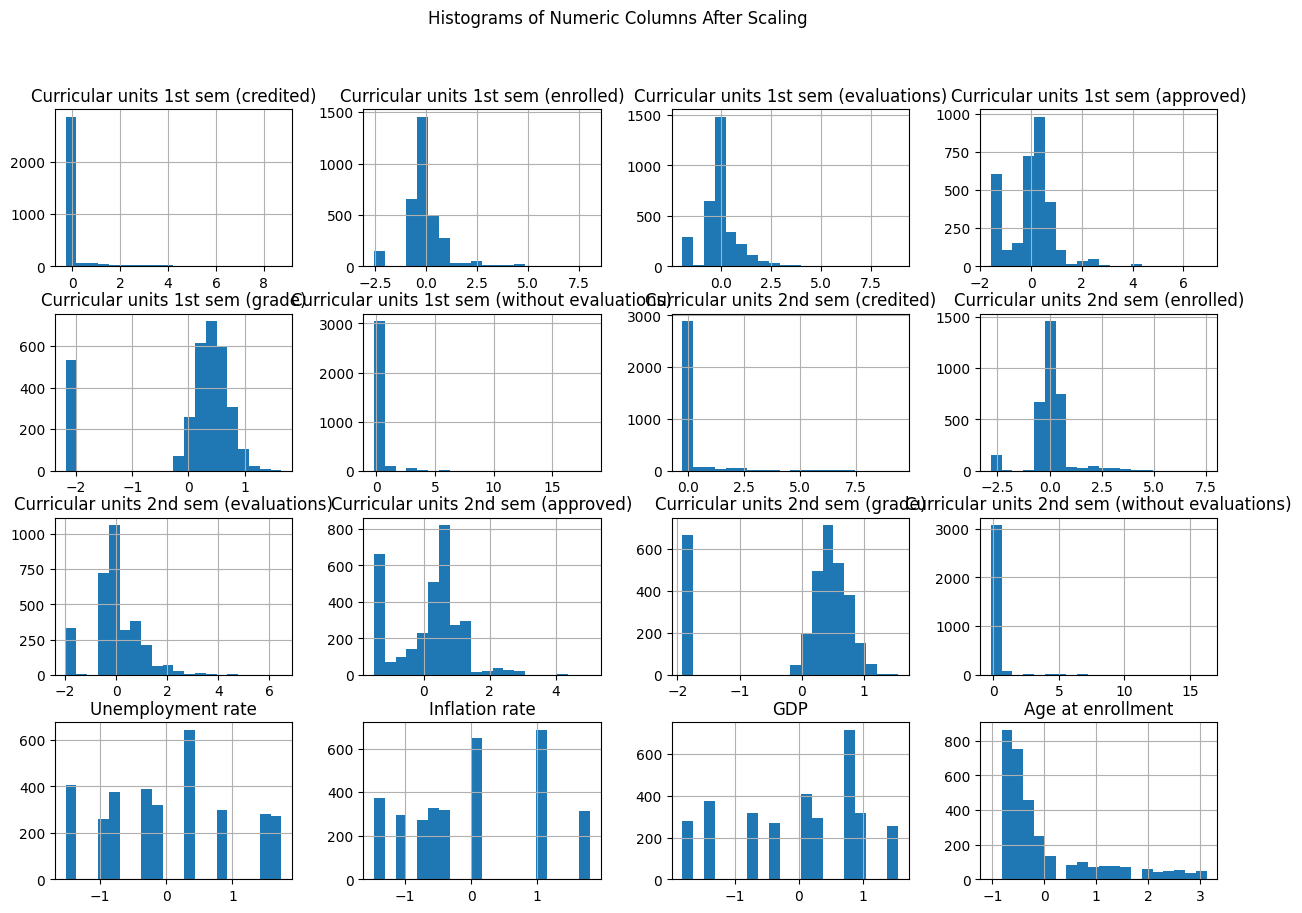

In [16]:
X_features[numeric_cols_to_scale].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numeric Columns After Scaling")
plt.show()

In [17]:
# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Balance Target column(SMOTE)

In [18]:
from imblearn.over_sampling import SMOTE

X_all = df.drop('Target', axis=1)
y_all = df['Target']

smote_all = SMOTE(random_state=42)
X_balanced_all, y_balanced_all = smote_all.fit_resample(X_all, y_all)

# Recreate a balanced DataFrame for feature selection
df_balanced = pd.DataFrame(X_balanced_all, columns=X_all.columns)
df_balanced['Target'] = y_balanced_all

print(df_balanced['Target'].value_counts())

Target
1    2057
0    2057
Name: count, dtype: int64


In [19]:
df_balanced.duplicated().sum()

np.int64(5)

In [20]:
df_balanced = df_balanced.drop_duplicates()


In [21]:
print(df_balanced['Target'].value_counts())

Target
0    2057
1    2052
Name: count, dtype: int64


plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df_balanced, palette='Set2')
plt.title("Target Distribution After SMOTE")
plt.xlabel("Target Class")
plt.ylabel("Number of Samples")
plt.show()

### Feature Selection

#### Numeric Feature Correlation

In [22]:
X_num_balanced = df_balanced[numeric_cols_to_scale]
y_balanced = df_balanced['Target']

df_corr = X_num_balanced.copy()
df_corr['Target'] = y_balanced

corr_matrix = df_corr.corr()
target_corr = corr_matrix['Target'].drop('Target')

top_numeric_features = target_corr.abs().sort_values(ascending=False).head(10).index
print("Top numeric features by correlation:", top_numeric_features)

Top numeric features by correlation: Index(['Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)',
       'Age at enrollment', 'Curricular units 2nd sem (enrolled)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (without evaluations)',
       'Curricular units 1st sem (evaluations)'],
      dtype='object')


#### Numeric Feature Correlation

In [23]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Identify categorical columns (all columns not in numeric_cols_to_scale or 'Target')
categorical_encoded_cols = [col for col in df_balanced.columns
                            if col not in numeric_cols_to_scale + ['Target']]

print("Categorical columns for Chi-Square:", categorical_encoded_cols)

X_cat_balanced = df_balanced[categorical_encoded_cols]

chi_selector = SelectKBest(score_func=chi2, k=10)
X_cat_selected = chi_selector.fit_transform(X_cat_balanced, y_balanced)

selected_cat_features = X_cat_balanced.columns[chi_selector.get_support()]
print("\nTop categorical features by Chi-Square:", selected_cat_features)

Categorical columns for Chi-Square: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

Top categorical features by Chi-Square: Index(['Application mode', 'Application order', 'Previous qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder'],
      dtype='object')


### Final Feature Set & Data Split

In [24]:
# Final selected features based on analysis and your notebook's list
categorical_features = [
    'Course',
    'Marital status',
    'Displaced',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'Daytime/evening attendance'
]

numeric_features = [
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (grade)',
    'Age at enrollment'
]

target_col = ['Target']

# Combine selected features and target
selected_columns = categorical_features + numeric_features + target_col

# Create the final processed DataFrame from the balanced data
processed_data_set = df_balanced[selected_columns].copy()

# Save this final dataset for record-keeping
processed_data_set.to_csv("processed_data_set.csv", index=False)

processed_data_set.head()

,Course,Marital status,Displaced,Tuition fees up to date,Gender,Scholarship holder,Daytime/evening attendance,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Age at enrollment,Target
0,2,1,1,1,1,0,1,0.000000,0.000000,20,1
1,11,1,1,0,1,0,1,13.666667,14.000000,19,0
2,5,1,1,0,1,0,1,0.000000,0.000000,19,1
3,15,1,1,1,0,0,1,12.400000,13.428571,20,0
4,12,1,1,1,0,1,1,14.345000,13.300000,18,0


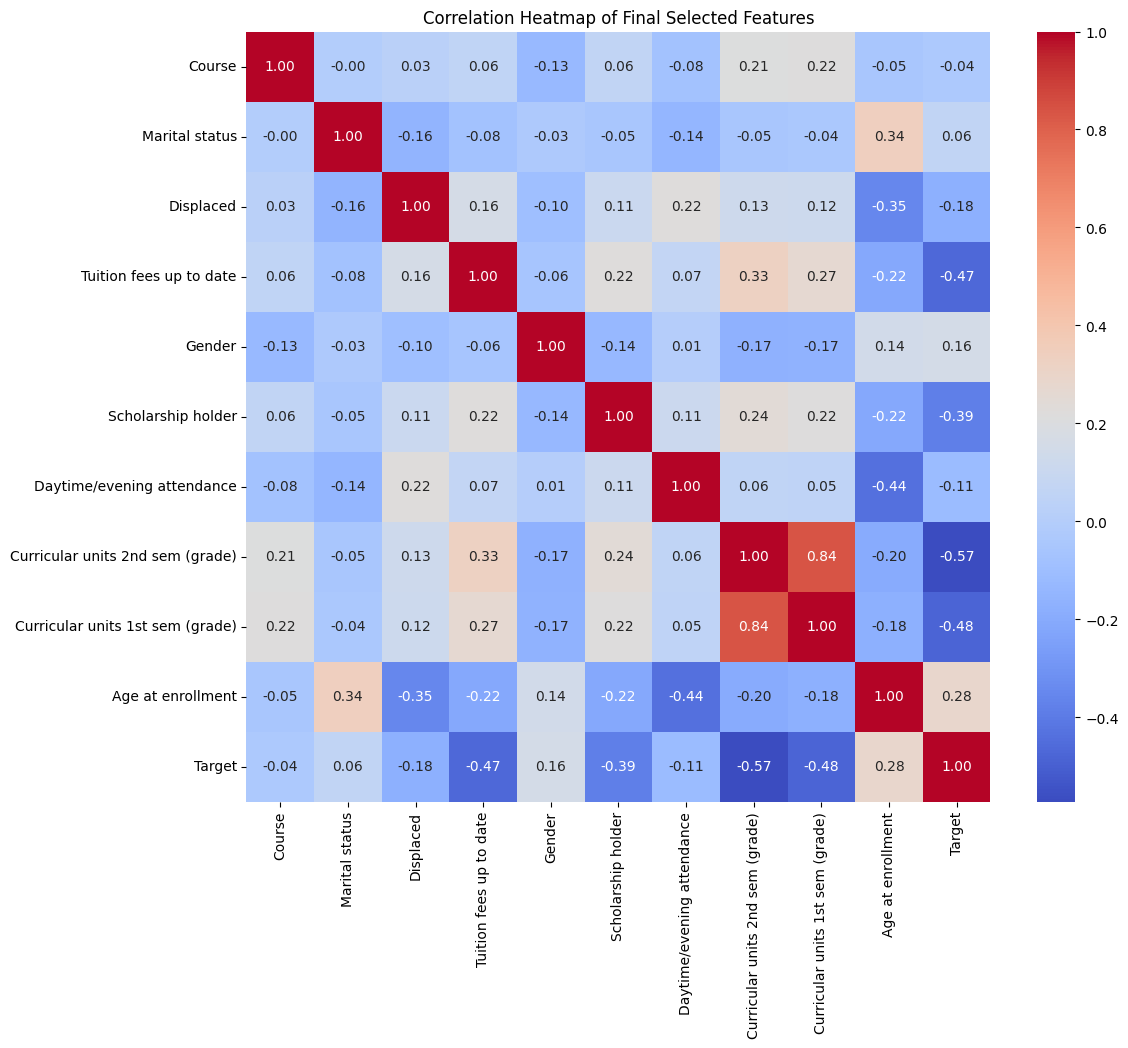

In [25]:
# Correlation heatmap of the *final* selected features
plt.figure(figsize=(12,10))
sns.heatmap(processed_data_set.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Final Selected Features")
plt.show()

#### Final Train-Test Split & SMOTE Application

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_features = df.drop('Target', axis=1)
y_target = df['Target']

X_selected = X_features[categorical_features + numeric_features]
y = y_target

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 2. SMOTE IS APPLY ONLY FOR THE TRAINING DATASET
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Train/Test split and SMOTE applied.")
print(f"Training samples (balanced): {X_train.shape[0]}, Testing samples (imbalanced): {X_test.shape[0]}")
print("\nTraining data target distribution:\n", y_train.value_counts())
print("\nTesting data target distribution:\n", y_test.value_counts())

Train/Test split and SMOTE applied.
Training samples (balanced): 3290, Testing samples (imbalanced): 649

Training data target distribution:
 Target
0    1645
1    1645
Name: count, dtype: int64

Testing data target distribution:
 Target
0    412
1    237
Name: count, dtype: int64


## Model Design, Implementation & Comparison

Models Selected

1. Logistic Regression 
2. Random Forest
3. Decision Tree 
4. SVM 
5. K-Nearest Neighbors (KNN)
6. XGBoost

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import loguniform, randint

# This list will store the results from each model for final comparison
model_results = []

### 1) Logistic Regression 

libraries

In [28]:
from sklearn.linear_model import LogisticRegression

Baseline Model (No Tuning)

Baseline Logistic Regression
Baseline Accuracy: 0.8752

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       412
           1       0.85      0.80      0.82       237

    accuracy                           0.88       649
   macro avg       0.87      0.86      0.86       649
weighted avg       0.87      0.88      0.87       649



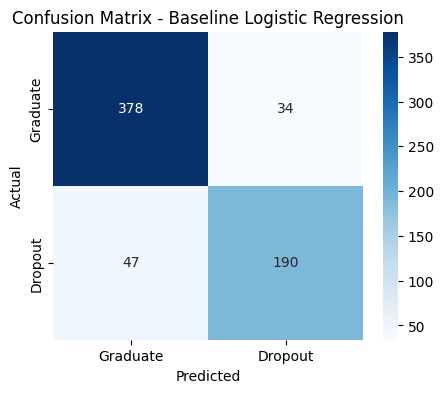

In [29]:
# Baseline Logistic Regression
print("Baseline Logistic Regression")
base_model_lr = LogisticRegression(max_iter=1000, random_state=42)
base_model_lr.fit(X_train, y_train)

y_pred_base_lr = base_model_lr.predict(X_test)

base_acc_lr = accuracy_score(y_test, y_pred_base_lr)
print(f"Baseline Accuracy: {base_acc_lr:.4f}")
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_base_lr))

cm_base_lr = confusion_matrix(y_test, y_pred_base_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_base_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()

Hyperparameter Tuning (RandomizedSearchCV)

In [30]:
param_distributions_lr = {
    'C': loguniform(0.001, 1000),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

random_search_lr = RandomizedSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_distributions=param_distributions_lr,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_lr.fit(X_train, y_train)

print("Best Parameters Found:", random_search_lr.best_params_)
best_lr = random_search_lr.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters Found: {'C': np.float64(1.3335385049873036), 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


Tuned Model Evaluation

Tuned Accuracy: 0.8767

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       412
           1       0.85      0.81      0.83       237

    accuracy                           0.88       649
   macro avg       0.87      0.86      0.87       649
weighted avg       0.88      0.88      0.88       649



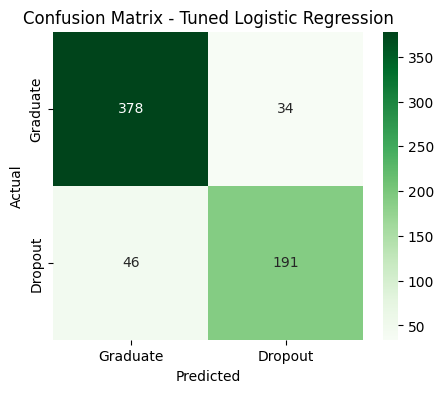

In [31]:
y_pred_tuned_lr = best_lr.predict(X_test)

tuned_acc_lr = accuracy_score(y_test, y_pred_tuned_lr)
print(f"Tuned Accuracy: {tuned_acc_lr:.4f}")
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned_lr))

# Confusion Matrix - Tuned
cm_tuned_lr = confusion_matrix(y_test, y_pred_tuned_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tuned_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()

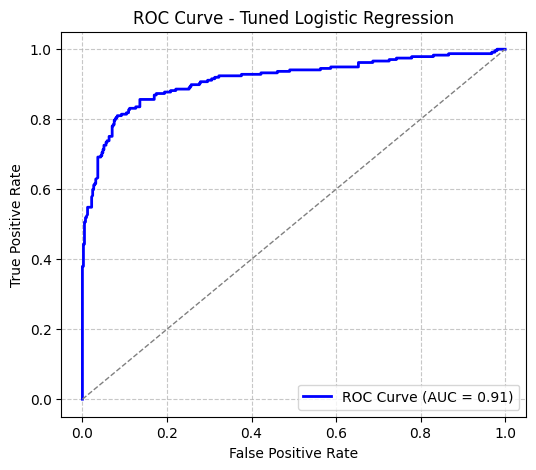

In [32]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (for positive class)
y_prob_tuned = best_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tuned)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Validation Method (K-Fold Cross-Validation)

In [33]:
cv_scores_lr = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", np.round(cv_scores_lr, 4))
print(f"Mean CV Accuracy: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")

Cross-validation scores: [0.8419 0.8298 0.8298 0.8359 0.8313]
Mean CV Accuracy: 0.8337 ± 0.0047


Conclusion & Limitations

In [34]:
model_results.append({
    'Model': 'Logistic Regression',
    'Test Accuracy': tuned_acc_lr,
    'CV Mean Accuracy': cv_scores_lr.mean(),
    'CV Std': cv_scores_lr.std(),
    'Trained Model':best_lr
})

### 2) Random Forest 

Libraries

In [35]:
from sklearn.ensemble import RandomForestClassifier

Baseline Model (No Tuning)

Baseline Accuracy: 0.8829

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       412
           1       0.86      0.81      0.84       237

    accuracy                           0.88       649
   macro avg       0.88      0.87      0.87       649
weighted avg       0.88      0.88      0.88       649



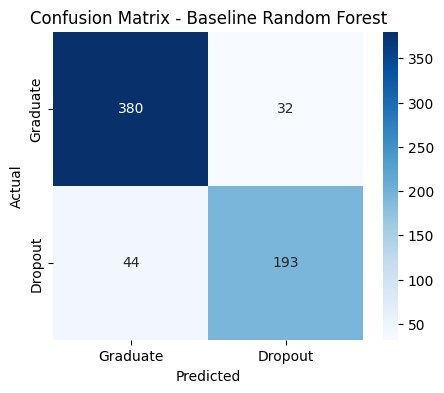

In [36]:
# Baseline Random Forest
base_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
base_model_rf.fit(X_train, y_train)

y_pred_base_rf = base_model_rf.predict(X_test)

base_acc_rf = accuracy_score(y_test, y_pred_base_rf)
print(f"Baseline Accuracy: {base_acc_rf:.4f}")
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_base_rf))

cm_base_rf = confusion_matrix(y_test, y_pred_base_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_base_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Random Forest")
plt.show()

Hyperparameter Tuning (RandomizedSearchCV)

In [37]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train, y_train)
print("Best Parameters Found:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters Found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': None, 'bootstrap': True}


Tuned Model Evaluation

Tuned Accuracy: 0.8783

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       412
           1       0.85      0.81      0.83       237

    accuracy                           0.88       649
   macro avg       0.87      0.86      0.87       649
weighted avg       0.88      0.88      0.88       649



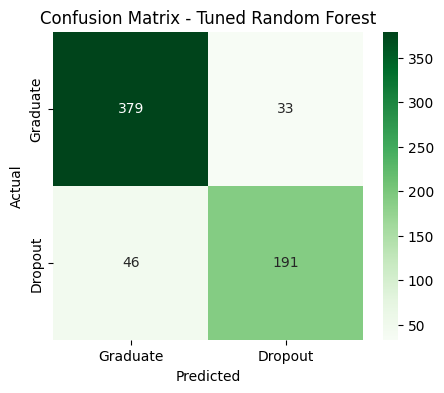

In [38]:
y_pred_tuned_rf = best_rf.predict(X_test)

tuned_acc_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(f"Tuned Accuracy: {tuned_acc_rf:.4f}")
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned_rf))

# Confusion Matrix - Tuned
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

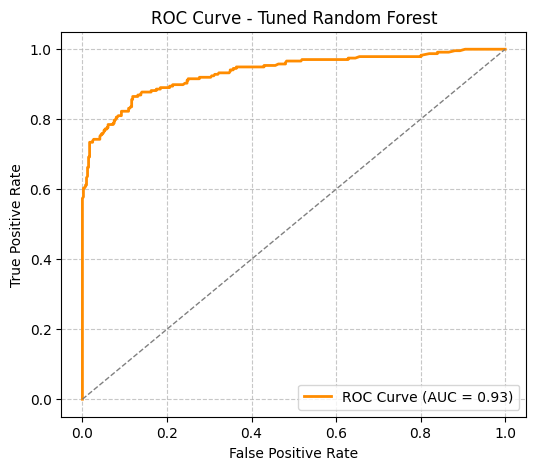

In [39]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf_tuned)

# Compute AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Validation Method (K-Fold Cross-Validation)

In [40]:
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", np.round(cv_scores_rf, 4))
print(f"Mean CV Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

Cross-validation scores: [0.8647 0.8541 0.8678 0.9088 0.8784]
Mean CV Accuracy: 0.8748 ± 0.0187


Conclusion & Limitations

In [41]:
model_results.append({
    'Model': 'Random Forest',
    'Test Accuracy': tuned_acc_rf,
    'CV Mean Accuracy': cv_scores_rf.mean(),
    'CV Std': cv_scores_rf.std(),
    'Trained Model':best_rf
})

### Decision Tree

Libraries

In [42]:
from sklearn.tree import DecisionTreeClassifier

Baseline Model (No Tuning)

Baseline Accuracy: 0.8367

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       412
           1       0.75      0.83      0.79       237

    accuracy                           0.84       649
   macro avg       0.82      0.83      0.83       649
weighted avg       0.84      0.84      0.84       649



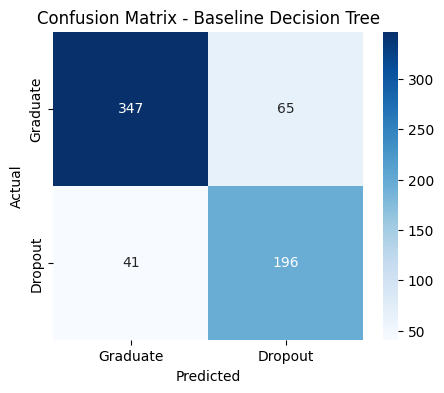

In [43]:
# Baseline Decision Tree
base_model_dt = DecisionTreeClassifier(random_state=42)
base_model_dt.fit(X_train, y_train)

y_pred_base_dt = base_model_dt.predict(X_test)

base_acc_dt = accuracy_score(y_test, y_pred_base_dt)
print(f"Baseline Accuracy: {base_acc_dt:.4f}")
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_base_dt))

cm_base_dt = confusion_matrix(y_test, y_pred_base_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_base_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.show()

Hyperparameter Tuning (RandomizedSearchCV)

In [44]:
param_dist_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

dt_random = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

dt_random.fit(X_train, y_train)
print("Best Parameters Found:", dt_random.best_params_)
best_dt = dt_random.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters Found: {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}


Tuned Model Evaluation

Tuned Accuracy: 0.8336

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       412
           1       0.77      0.77      0.77       237

    accuracy                           0.83       649
   macro avg       0.82      0.82      0.82       649
weighted avg       0.83      0.83      0.83       649



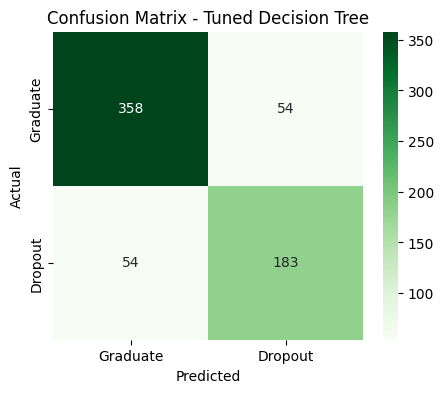

In [45]:
y_pred_tuned_dt = best_dt.predict(X_test)

tuned_acc_dt = accuracy_score(y_test, y_pred_tuned_dt)
print(f"Tuned Accuracy: {tuned_acc_dt:.4f}")
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned_dt))

# Confusion Matrix - Tuned
cm_tuned_dt = confusion_matrix(y_test, y_pred_tuned_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tuned_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.show()

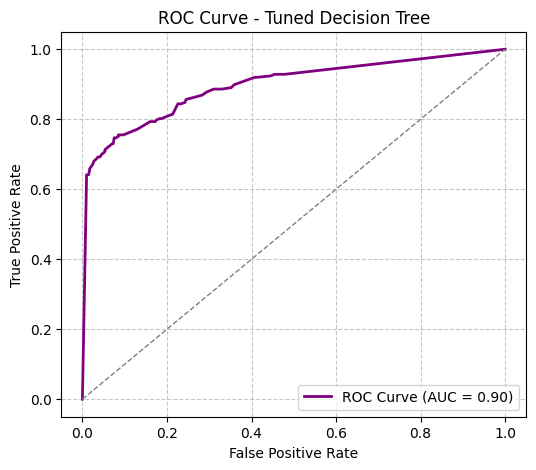

In [46]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_prob_dt_tuned = best_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt_tuned)

# Compute AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Validation Method (K-Fold Cross-Validation)

In [47]:
cv_scores_dt = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", np.round(cv_scores_dt, 4))
print(f"Mean CV Accuracy: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")

Cross-validation scores: [0.8404 0.8435 0.8389 0.8617 0.8556]
Mean CV Accuracy: 0.8480 ± 0.0090


Conclusion & Limitations

In [48]:
model_results.append({
    'Model': 'Decision Tree',
    'Test Accuracy': tuned_acc_dt,
    'CV Mean Accuracy': cv_scores_dt.mean(),
    'CV Std': cv_scores_dt.std(),
    'Trained Model':best_dt
})

### 4) SVM 

Libraries

In [49]:
from sklearn.svm import SVC
from scipy.stats import uniform

Baseline Model (No Tuning)

Baseline Accuracy: 0.8582

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       412
           1       0.84      0.76      0.80       237

    accuracy                           0.86       649
   macro avg       0.85      0.84      0.84       649
weighted avg       0.86      0.86      0.86       649



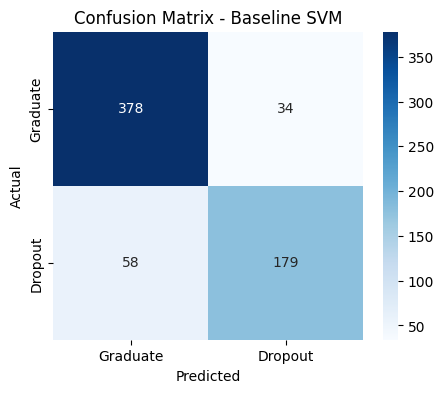

In [50]:
# Baseline SVM
base_model_svm = SVC(random_state=42)
base_model_svm.fit(X_train, y_train)

y_pred_base_svm = base_model_svm.predict(X_test)

base_acc_svm = accuracy_score(y_test, y_pred_base_svm)
print(f"Baseline Accuracy: {base_acc_svm:.4f}")
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_base_svm))

cm_base_svm = confusion_matrix(y_test, y_pred_base_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_base_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline SVM")
plt.show()

Hyperparameter Tuning (RandomizedSearchCV)

In [51]:
param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

svm_random = RandomizedSearchCV(
    SVC(random_state=42, probability=True),  # Added probability=True for potential ROC-AUC
    param_distributions=param_dist_svm,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

svm_random.fit(X_train, y_train)
print("Best Parameters Found:", svm_random.best_params_)
best_svm = svm_random.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters Found: {'C': np.float64(4.010606075732408), 'gamma': 'auto', 'kernel': 'rbf'}


Tuned Model Evaluation

Tuned Accuracy: 0.8629

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       412
           1       0.84      0.77      0.80       237

    accuracy                           0.86       649
   macro avg       0.86      0.84      0.85       649
weighted avg       0.86      0.86      0.86       649



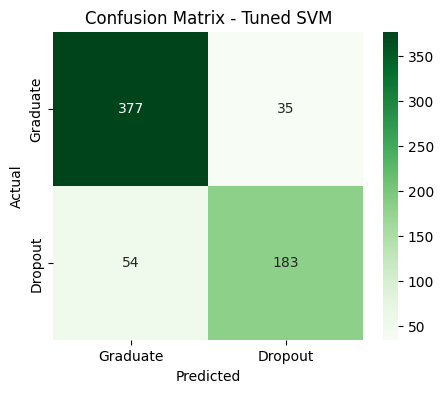

In [52]:
y_pred_tuned_svm = best_svm.predict(X_test)

tuned_acc_svm = accuracy_score(y_test, y_pred_tuned_svm)
print(f"Tuned Accuracy: {tuned_acc_svm:.4f}")
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned_svm))

# Confusion Matrix - Tuned
cm_tuned_svm = confusion_matrix(y_test, y_pred_tuned_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tuned_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned SVM")
plt.show()

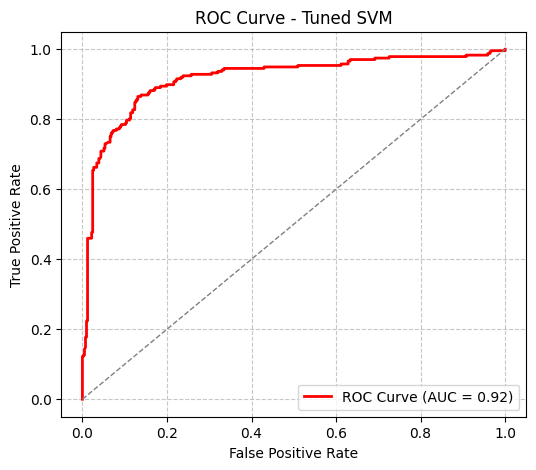

In [53]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_svm_tuned = best_svm.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm_tuned)

# Compute AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned SVM')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Validation Method (K-Fold Cross-Validation)

In [54]:
cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", np.round(cv_scores_svm, 4))
print(f"Mean CV Accuracy: {cv_scores_svm.mean():.4f} ± {cv_scores_svm.std():.4f}")

Cross-validation scores: [0.8526 0.8647 0.8617 0.8754 0.8769]
Mean CV Accuracy: 0.8663 ± 0.0090


Conclusion & Limitations

In [55]:
model_results.append({
    'Model': 'SVM',
    'Test Accuracy': tuned_acc_svm,
    'CV Mean Accuracy': cv_scores_svm.mean(),
    'CV Std': cv_scores_svm.std(),
    'Trained Model':best_svm
})

### 5) K-Nearest Neighbors (KNN)

Libraries

In [56]:
from sklearn.neighbors import KNeighborsClassifier

Baseline Model (No Tuning)

Baseline Accuracy: 0.8428

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       412
           1       0.78      0.80      0.79       237

    accuracy                           0.84       649
   macro avg       0.83      0.83      0.83       649
weighted avg       0.84      0.84      0.84       649



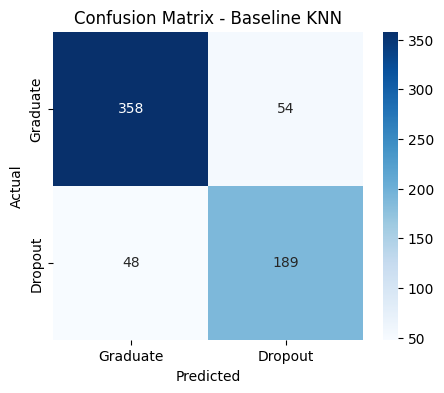

In [57]:
# Baseline KNN
base_model_knn = KNeighborsClassifier() # Default n_neighbors=5
base_model_knn.fit(X_train, y_train)

y_pred_base_knn = base_model_knn.predict(X_test)

base_acc_knn = accuracy_score(y_test, y_pred_base_knn)
print(f"Baseline Accuracy: {base_acc_knn:.4f}")
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_base_knn))

cm_base_knn = confusion_matrix(y_test, y_pred_base_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_base_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline KNN")
plt.show()

Hyperparameter Tuning (RandomizedSearchCV)

In [58]:
param_dist_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_random = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

knn_random.fit(X_train, y_train)
print("Best Parameters Found:", knn_random.best_params_)
best_knn = knn_random.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters Found: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}


Tuned Model Evaluation

Tuned Accuracy: 0.8459

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       412
           1       0.78      0.81      0.79       237

    accuracy                           0.85       649
   macro avg       0.83      0.84      0.84       649
weighted avg       0.85      0.85      0.85       649



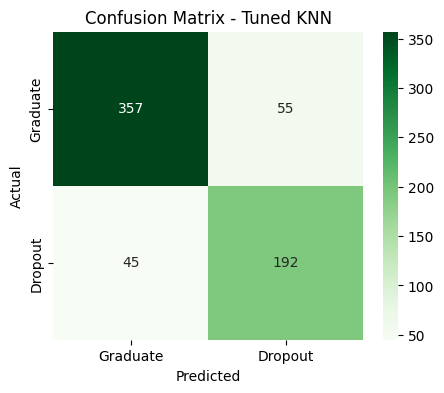

In [59]:
y_pred_tuned_knn = best_knn.predict(X_test)

tuned_acc_knn = accuracy_score(y_test, y_pred_tuned_knn)
print(f"Tuned Accuracy: {tuned_acc_knn:.4f}")
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned_knn))

# Confusion Matrix - Tuned
cm_tuned_knn = confusion_matrix(y_test, y_pred_tuned_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tuned_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned KNN")
plt.show()

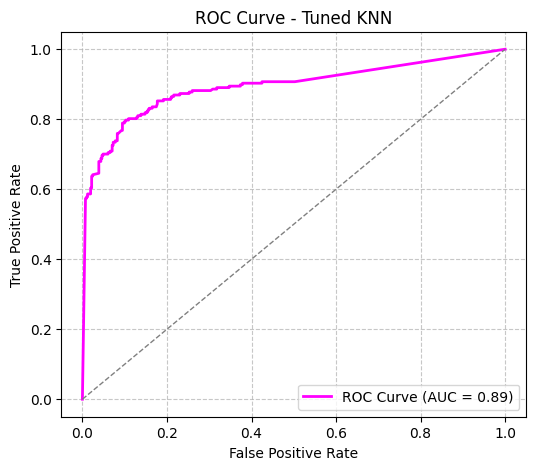

In [60]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_knn_tuned = best_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn_tuned)

# Compute AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_knn, tpr_knn, color='magenta', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned KNN')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Validation Method (K-Fold Cross-Validation)

In [61]:
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", np.round(cv_scores_knn, 4))
print(f"Mean CV Accuracy: {cv_scores_knn.mean():.4f} ± {cv_scores_knn.std():.4f}")

Cross-validation scores: [0.8556 0.8343 0.8708 0.8906 0.8982]
Mean CV Accuracy: 0.8699 ± 0.0232


Conclusion & Limitations

In [62]:
#add to result
model_results.append({
    'Model': 'KNN',
    'Test Accuracy': tuned_acc_knn,
    'CV Mean Accuracy': cv_scores_knn.mean(),
    'CV Std': cv_scores_knn.std(),
    'Trained Model':best_knn
})

### 6) XGBoost 

Libraries

In [63]:
from xgboost import XGBClassifier

C:\Users\rt.x\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [17:57:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Baseline Accuracy: 0.8737

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       412
           1       0.82      0.83      0.83       237

    accuracy                           0.87       649
   macro avg       0.86      0.86      0.86       649
weighted avg       0.87      0.87      0.87       649



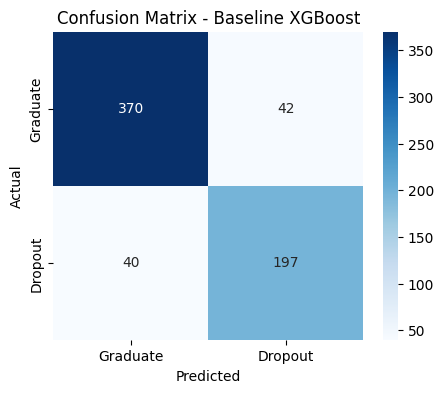

In [64]:
# Baseline XGBoost
xgb_base = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
xgb_base.fit(X_train, y_train)

y_pred_xgb_base = xgb_base.predict(X_test)

acc_xgb_base = accuracy_score(y_test, y_pred_xgb_base)
print(f"Baseline Accuracy: {acc_xgb_base:.4f}")
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_xgb_base))

cm_xgb_base = confusion_matrix(y_test, y_pred_xgb_base)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb_base, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline XGBoost")
plt.show()

Hyperparameter Tuning (RandomizedSearchCV)

In [65]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False),
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train, y_train)
print("Best Parameters Found:", xgb_random.best_params_)
best_xgb = xgb_random.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\rt.x\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [17:58:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters Found: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


Tuned Model Evaluation

Tuned Accuracy: 0.8675

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       412
           1       0.83      0.80      0.82       237

    accuracy                           0.87       649
   macro avg       0.86      0.85      0.86       649
weighted avg       0.87      0.87      0.87       649



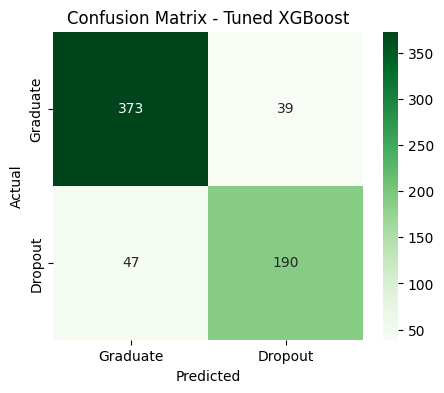

In [66]:
y_pred_tuned_xgb = best_xgb.predict(X_test)

tuned_acc_xgb = accuracy_score(y_test, y_pred_tuned_xgb)
print(f"Tuned Accuracy: {tuned_acc_xgb:.4f}")
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned_xgb))

# Confusion Matrix - Tuned
cm_xgb_tuned = confusion_matrix(y_test, y_pred_tuned_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

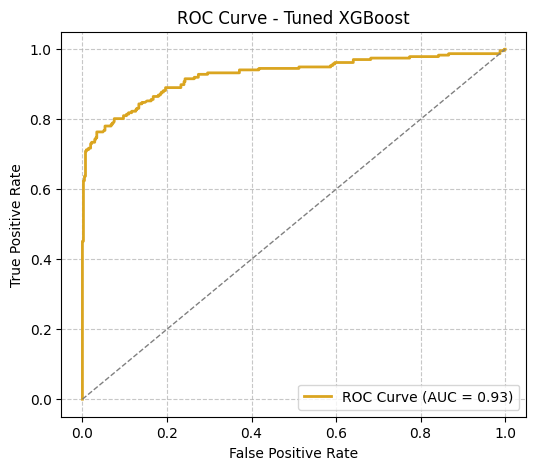

In [67]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb_tuned)

# Compute AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, color='goldenrod', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Validation Method (K-Fold Cross-Validation)

In [68]:
cv_scores_xgb = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", np.round(cv_scores_xgb, 4))
print(f"Mean CV Accuracy: {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}")

Cross-validation scores: [0.8617 0.8663 0.8739 0.8982 0.886 ]
Mean CV Accuracy: 0.8772 ± 0.0133


Conclusion & Limitations

In [69]:
model_results.append({
    'Model': 'XGBoost',
    'Test Accuracy': tuned_acc_xgb,
    'CV Mean Accuracy': cv_scores_xgb.mean(),
    'CV Std': cv_scores_xgb.std(),
    'Trained Model': best_xgb  
})


### Model Comparison

In [70]:
df_comparison = pd.DataFrame(model_results)
df_comparison = df_comparison.sort_values(by='CV Mean Accuracy', ascending=False)

print("\nModel Comparison Table (Sorted by CV Mean Accuracy):\n")
print(df_comparison.to_string())



Model Comparison Table (Sorted by CV Mean Accuracy):

                 Model  Test Accuracy  CV Mean Accuracy    CV Std                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [76]:
best_row = df_comparison.iloc[0]
best_model = best_row['Trained Model']
best_model_name = best_row['Model']
print(best_model_name)


XGBoost


### Visualization of Model Performance

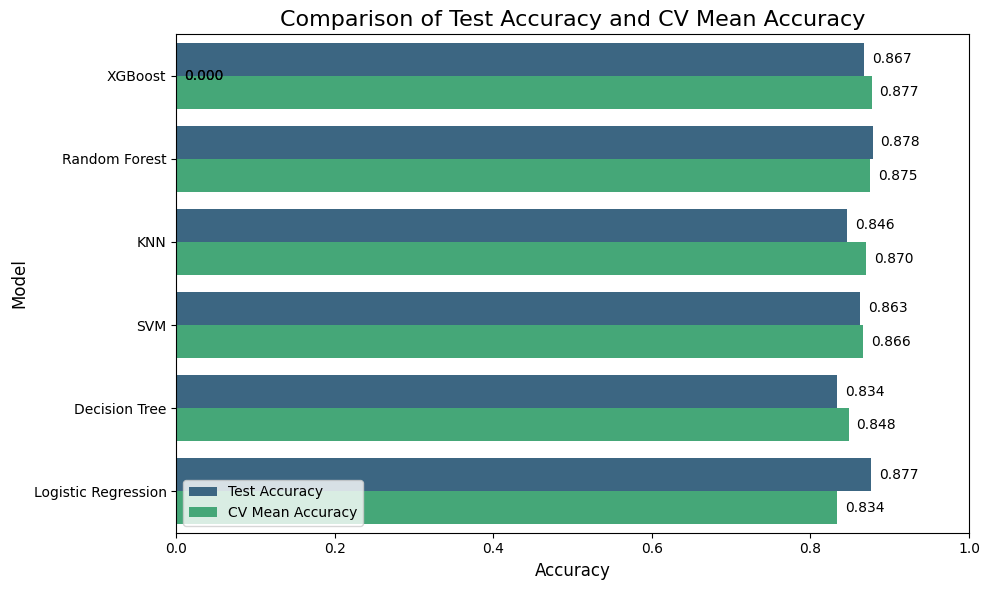

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt for plotting
df_plot = df_comparison.melt(
    id_vars='Model',
    value_vars=['Test Accuracy', 'CV Mean Accuracy'],
    var_name='Metric',
    value_name='Accuracy'
)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Accuracy', y='Model', hue='Metric', data=df_plot, palette='viridis')

plt.title("Comparison of Test Accuracy and CV Mean Accuracy", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)

plt.xlim(0, 1)

# Add labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height() / 2,
             f'{width:.3f}', va='center')

plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [73]:
print(df_comparison.columns.tolist())


['Model', 'Test Accuracy', 'CV Mean Accuracy', 'CV Std', 'Trained Model']


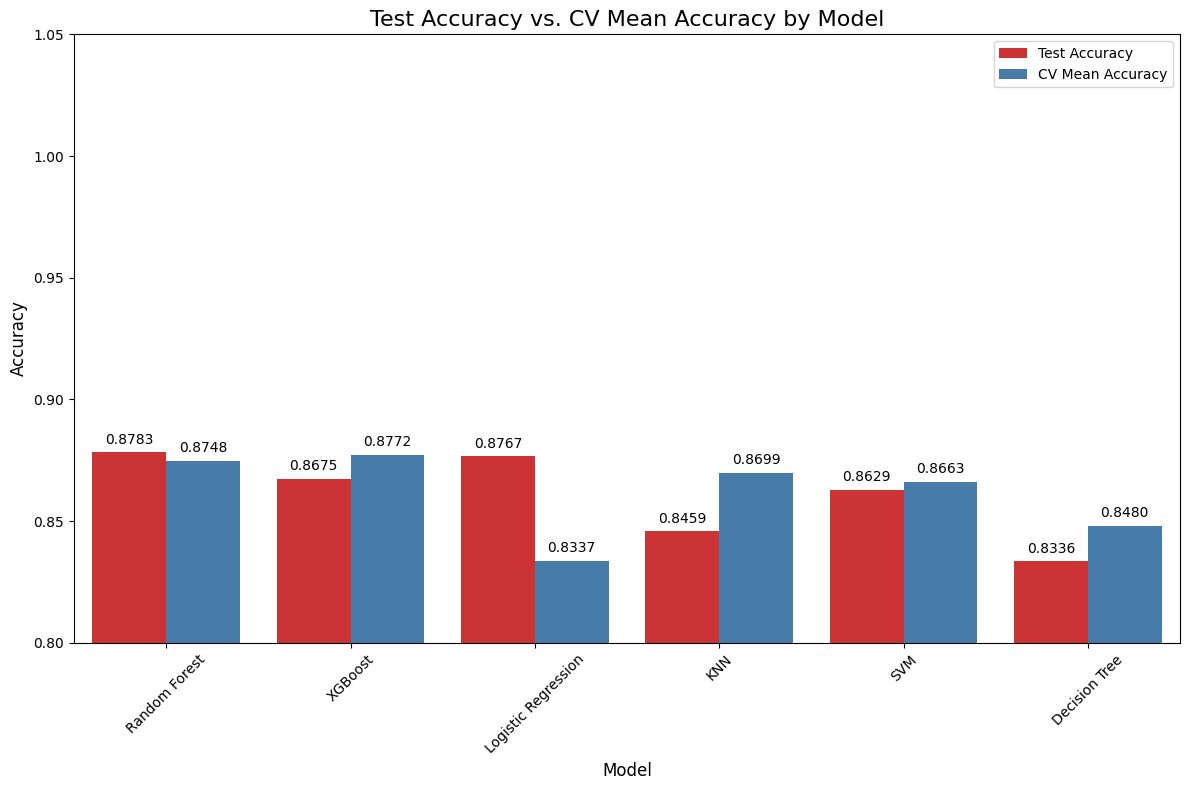

In [74]:
# Melt the dataframe for plotting
df_plot = df_comparison.melt(
    id_vars='Model',
    value_vars=['Test Accuracy', 'CV Mean Accuracy'],
    var_name='Metric',
    value_name='Accuracy'
)

# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Model',
    y='Accuracy',
    hue='Metric',
    data=df_plot.sort_values('Accuracy', ascending=False),
    palette='Set1'
)

plt.title("Test Accuracy vs. CV Mean Accuracy by Model", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.8, 1.05)
plt.xticks(rotation=45)

# Add labels on bars
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [78]:
import os

downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

joblib.dump(best_model, os.path.join(downloads_path, 'best_model.pkl'))
print(f"Best model saved in {downloads_path}")

Best model saved in C:\Users\rt.x\Downloads
